Playing with jupyter notebook and netcdf file

Zink:
/home/tin/anaconda3/bin/jupyter lab

Should launch browser at the next avail port like:
http://localhost:8888/lab

Ref:
http://schubert.atmos.colostate.edu/~cslocum/netcdf_example.html#code



In [1]:
# from terminal:
# conda install requirements.txt ??
# conda install netCDF4 
#conda install -c conda-forge 
# https://anaconda.org/anaconda/basemap
# conda install -c anaconda basemap
#!conda list

In [17]:

!hostname
!pwd


zink
/home/tin/tin-gh/inet-dev-class/python


In [8]:
!export PROJ_LIB='.'
import os
os.environ['PROJ_LIB']='.'

In [9]:
import datetime as dt  # Python standard library datetime  module
import numpy as np
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
#from mpl_toolkits.basemap import Basemap

In [55]:
## this fn seems largely what the command ncdump provides

def ncdump(nc_fid, verb=True):
    '''
    ncdump outputs dimensions, variables and their attribute information.
    The information is similar to that of NCAR's ncdump utility.
    ncdump requires a valid instance of Dataset.

    Parameters
    ----------
    nc_fid : netCDF4.Dataset
        A netCDF4 dateset object
    verb : Boolean
        whether or not nc_attrs, nc_dims, and nc_vars are printed

    Returns
    -------
    nc_attrs : list
        A Python list of the NetCDF file global attributes
    nc_dims : list
        A Python list of the NetCDF file dimensions
    nc_vars : list
        A Python list of the NetCDF file variables
    '''
    def print_ncattr(key):
        """
        Prints the NetCDF file attributes for a given key

        Parameters
        ----------
        key : unicode
            a valid netCDF4.Dataset.variables key
        """
        try:
            print( "\t\ttype: %s" % repr(nc_fid.variables[key].dtype) )
            for ncattr in nc_fid.variables[key].ncattrs():
                print( '\t\t%s:' % ncattr,repr(nc_fid.variables[key].getncattr(ncattr)) )
        except KeyError:
            print( "\t\tWARNING: %s does not contain variable attributes" % key )

    # NetCDF global attributes
    nc_attrs = nc_fid.ncattrs()
    if verb:
        print( "NetCDF Global Attributes:" )
        for nc_attr in nc_attrs:
            print( '\t%s:' % nc_attr, repr(nc_fid.getncattr(nc_attr)) )
    nc_dims = [dim for dim in nc_fid.dimensions]  # list of nc dimensions
    # Dimension shape information.
    if verb:
        print( "NetCDF dimension information:" )
        for dim in nc_dims:
            print( "\tName: %s" % dim  )
            print( "\t\tsize: %s " % len(nc_fid.dimensions[dim]) )
            print_ncattr(dim)
    # Variable information.
    nc_vars = [var for var in nc_fid.variables]  # list of nc variables
    if verb:
        print( "NetCDF variable information:" )
        for var in nc_vars:
            if var not in nc_dims:
                print( '\tName: %s' % var )
                ##print( "\t\tdimensions: %s" % nc_fid.variables[var].dimensions )
                print( "\t\tsize: %s" % nc_fid.variables[var].size )
                print_ncattr(var)
    return nc_attrs, nc_dims, nc_vars

In [21]:
!ls ./DATA/

In [21]:
# -h for header only, omit displaying data.
!ncdump -h ./DATA/ca2010tr-density.nc

ca2010bg-density.nc  ca2010tr-density.nc  ca2018bg-density-lngLat.nc
netcdf ca2010tr-density {
dimensions:
	DATE-TIME = 2 ;
	VAR = 1 ;
	TSTEP = 1 ;
	COL = 96 ;
	ROW = 117 ;
	LAY = 1 ;
variables:
	int TFLAG(TSTEP, VAR, DATE-TIME) ;
		TFLAG:units = "<YYYYDDD,HHMMSS>" ;
		TFLAG:long_name = "TFLAG           " ;
		TFLAG:var_desc = "Timestep-valid flags:  (1) YYYYDDD or (2) HHMMSS                                " ;
	float Popdens(TSTEP, LAY, ROW, COL) ;
		Popdens:units = "people/km^2     " ;
		Popdens:long_name = "Popdens         " ;
		Popdens:var_desc = "Population density                                                              " ;

// global attributes:
		:IOAPI_VERSION = "2.2 2002080 (March 21, 2002)                                                    " ;
		:EXEC_ID = "CalEnv-ncfile.R                                                                 " ;
		:FTYPE = 1 ;
		:CDATE = 2020181 ;
		:CTIME = 161116 ;
		:WDATE = 2020181 ;
		:WTIME = 161116 ;
		:SDATE = 2000158 ;
		:STIME = 70000 

In [35]:
# original post used './air.sig995.2012.nc', which can be downloaded from:
# https://psl.noaa.gov/repository/entry/show/PSD+Climate+Data+Repository/Public/PSD+Datasets/NCEP+Reanalysis+(R1)/4xDaily+Grids/Surface/Air+Temperature+at+sigma+level+995/air.sig995.2012.nc?entryid=972f08b9-e4b1-4edf-94e8-5ad7c4d8b33d&output=default.html

!ls -l DATA/

total 21904
-rw-rw-r-- 1 tin users 22280754 Jul 13 16:03 air.sig995.2012.nc
-rw-rw-r-- 1 tin users    46684 Jul  6 16:18 ca2010bg-density.nc
-rw-rw-r-- 1 tin users    46684 Jul  6 16:18 ca2010tr-density.nc
-rw-rw-r-- 1 tin users    46684 Jul  6 16:18 ca2018bg-density-lngLat.nc


In [57]:
![[ -d OUTPUT ]] || mkdir OUTPUT

# TBD, change code to write output to OUTPUT/ dir

/bin/sh: 1: [[: not found
mkdir: cannot create directory ‘OUTPUT’: File exists


In [43]:

## sn50
## nc_f = './DATA/ca2010tr-density.nc'  ##sn50

nc_f = './DATA/air.sig995.2012.nc'  # Your filename

#nc_f = './air.sig995.2012.nc'  # Your filename

nc_fid = Dataset(nc_f, 'r')  # Dataset is the class behavior to open the file
                             # and create an instance of the ncCDF4 class
    

In [47]:
nc_attrs, nc_dims, nc_vars = ncdump(nc_fid)

# Extract data from NetCDF file

lats = nc_fid.variables['lat'][:]  # extract/copy the data
lons = nc_fid.variables['lon'][:]
time = nc_fid.variables['time'][:]
air = nc_fid.variables['air'][:]  # shape is time, lat, lon as shown above

## these field does not exist in the .nc file Quentin generated  ##sn50
##lats = nc_fid.variables['lat'][:]  # extract/copy the data
##lons = nc_fid.variables['lon'][:]
##time = nc_fid.variables['time'][:]
##air = nc_fid.variables['air'][:]  # shape is time, lat, lon as shown above

## Quentin/Ling .nc file has been rasterized to produce a grid and don't have lat/lon data in it anymore
## so rest of this eg likely not all that useful/relevant.

time_idx = 237  # some random day in 2012
# Python and the renalaysis are slightly off in time so this fixes that problem
offset = dt.timedelta(hours=48)
# List of all times in the file as datetime objects
dt_time = [dt.date(1, 1, 1) + dt.timedelta(hours=t) - offset   for t in time]
cur_time = dt_time[time_idx]
##dt_time = [dt.date(1, 1, 1) + dt.timedelta(hours=t) - offset   for t in time]
##cur_time = dt_time[time_idx]

NetCDF Global Attributes:
	Conventions: 'COARDS'
	title: '4x daily NMC reanalysis (2012)'
	description: 'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.'
	platform: 'Model'
	history: 'created 2011/12 by Hoop (netCDF2.3)\nConverted to chunked, deflated non-packed NetCDF4 2014/09'
	dataset_title: 'NCEP-NCAR Reanalysis 1'
	References: 'http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.html'
NetCDF dimension information:
	Name: lat
		size: 73 
		type: dtype('float32')
		units: 'degrees_north'
		actual_range: array([ 90., -90.], dtype=float32)
		long_name: 'Latitude'
		standard_name: 'latitude'
		axis: 'Y'
	Name: lon
		size: 144 
		type: dtype('float32')
		units: 'degrees_east'
		long_name: 'Longitude'
		actual_range: array([  0. , 357.5], dtype=float32)
		standard_name: 'longitude'
		axis: 'X'
	Name: time
		size: 1464 
		type: dtype('float64')
		long_name: 'Time'
		delta_t: '0000-00-00 06:00:00'
		standard_name: 'time'
		axis: 'T'
		unit

/home/tin/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:3188: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


Text(0.5, 1.0, 'Air temperature on 0213-02-27')

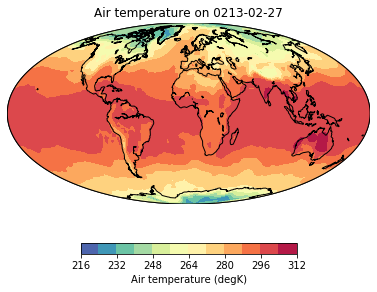

In [50]:
## air is not defined
## which seems to depend on lat, which Ling's .nc file dont have
## sn50


# Plot of global temperature on our random day
fig = plt.figure()
fig.subplots_adjust(left=0., right=1., bottom=0., top=0.9)
# Setup the map. See http://matplotlib.org/basemap/users/mapsetup.html
# for other projections.
m = Basemap(projection='moll', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
m.drawcoastlines()
m.drawmapboundary()
# Make the plot continuous
air_cyclic, lons_cyclic = addcyclic(air[time_idx, :, :], lons)
# Shift the grid so lons go from -180 to 180 instead of 0 to 360.
air_cyclic, lons_cyclic = shiftgrid(180., air_cyclic, lons_cyclic, start=False)
# Create 2D lat/lon arrays for Basemap
lon2d, lat2d = np.meshgrid(lons_cyclic, lats)
# Transforms lat/lon into plotting coordinates for projection
x, y = m(lon2d, lat2d)
# Plot of air temperature with 11 contour intervals
cs = m.contourf(x, y, air_cyclic, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label("%s (%s)" % (nc_fid.variables['air'].var_desc,\
                            nc_fid.variables['air'].units))
plt.title("%s on %s" % (nc_fid.variables['air'].var_desc, cur_time))


In [52]:
# Writing NetCDF files
# For this example, we will create two NetCDF4 files. One with the global air
# temperature departure from its value at Darwin, Australia. The other with
# the temperature profile for the entire year at Darwin.
darwin = {'name': 'Darwin, Australia', 'lat': -12.45, 'lon': 130.83}

# Find the nearest latitude and longitude for Darwin
lat_idx = np.abs(lats - darwin['lat']).argmin()
lon_idx = np.abs(lons - darwin['lon']).argmin()

# Simple example: temperature profile for the entire year at Darwin.
# Open a new NetCDF file to write the data to. For format, you can choose from
# 'NETCDF3_CLASSIC', 'NETCDF3_64BIT', 'NETCDF4_CLASSIC', and 'NETCDF4'
w_nc_fid = Dataset('darwin_2012.nc', 'w', format='NETCDF4')
w_nc_fid.description = "NCEP/NCAR Reanalysis %s from its value at %s. %s" %\
                      (nc_fid.variables['air'].var_desc.lower(),\
                       darwin['name'], nc_fid.description)
# Using our previous dimension info, we can create the new time dimension
# Even though we know the size, we are going to set the size to unknown
w_nc_fid.createDimension('time', None)
w_nc_dim = w_nc_fid.createVariable('time', nc_fid.variables['time'].dtype,\
                                   ('time',))
# You can do this step yourself but someone else did the work for us.
for ncattr in nc_fid.variables['time'].ncattrs():
    w_nc_dim.setncattr(ncattr, nc_fid.variables['time'].getncattr(ncattr))
# Assign the dimension data to the new NetCDF file.
w_nc_fid.variables['time'][:] = time
w_nc_var = w_nc_fid.createVariable('air', 'f8', ('time'))
w_nc_var.setncatts({'long_name': u"mean Daily Air temperature",\
                    'units': u"degK", 'level_desc': u'Surface',\
                    'var_desc': u"Air temperature",\
                    'statistic': u'Mean\nM'})
w_nc_fid.variables['air'][:] = air[time_idx, lat_idx, lon_idx]
w_nc_fid.close()  # close the new file


Text(0.5, 1.0, 'Air temperature from\nDarwin, Australia for 213')

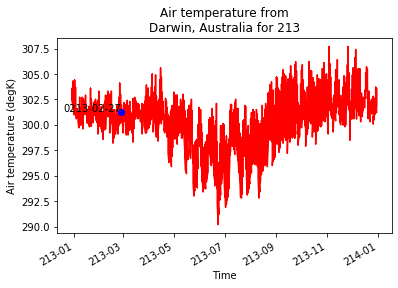

In [53]:

# A plot of the temperature profile for Darwin in 2012
fig = plt.figure()
plt.plot(dt_time, air[:, lat_idx, lon_idx], c='r')
plt.plot(dt_time[time_idx], air[time_idx, lat_idx, lon_idx], c='b', marker='o')
plt.text(dt_time[time_idx], air[time_idx, lat_idx, lon_idx], cur_time,\
         ha='right')
fig.autofmt_xdate()
plt.ylabel("%s (%s)" % (nc_fid.variables['air'].var_desc,\
                        nc_fid.variables['air'].units))
plt.xlabel("Time")
plt.title("%s from\n%s for %s" % (nc_fid.variables['air'].var_desc,\
                                  darwin['name'], cur_time.year))

/home/tin/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:3188: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


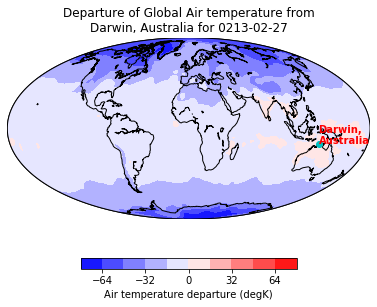

In [54]:

    



# Complex example: global temperature departure from its value at Darwin
departure = air[:, :, :] - air[:, lat_idx, lon_idx].reshape((time.shape[0],\
                                                             1, 1))

# Open a new NetCDF file to write the data to. For format, you can choose from
# 'NETCDF3_CLASSIC', 'NETCDF3_64BIT', 'NETCDF4_CLASSIC', and 'NETCDF4'
w_nc_fid = Dataset('air.departure.sig995.2012.nc', 'w', format='NETCDF4')
w_nc_fid.description = "The departure of the NCEP/NCAR Reanalysis " +\
                      "%s from its value at %s. %s" %\
                      (nc_fid.variables['air'].var_desc.lower(),\
                       darwin['name'], nc_fid.description)
# Using our previous dimension information, we can create the new dimensions
data = {}
for dim in nc_dims:
    w_nc_fid.createDimension(dim, nc_fid.variables[dim].size)
    data[dim] = w_nc_fid.createVariable(dim, nc_fid.variables[dim].dtype,\
                                        (dim,))
    # You can do this step yourself but someone else did the work for us.
    for ncattr in nc_fid.variables[dim].ncattrs():
        data[dim].setncattr(ncattr, nc_fid.variables[dim].getncattr(ncattr))
# Assign the dimension data to the new NetCDF file.
w_nc_fid.variables['time'][:] = time
w_nc_fid.variables['lat'][:] = lats
w_nc_fid.variables['lon'][:] = lons

# Ok, time to create our departure variable
w_nc_var = w_nc_fid.createVariable('air_dep', 'f8', ('time', 'lat', 'lon'))
w_nc_var.setncatts({'long_name': u"mean Daily Air temperature departure",\
                    'units': u"degK", 'level_desc': u'Surface',\
                    'var_desc': u"Air temperature departure",\
                    'statistic': u'Mean\nM'})
w_nc_fid.variables['air_dep'][:] = departure
w_nc_fid.close()  # close the new file

# Rounded maximum absolute value of the departure used for contouring
max_dep = np.round(np.abs(departure[time_idx, :, :]).max()+5., decimals=-1)

# Generate a figure of the departure for a single day
fig = plt.figure()
fig.subplots_adjust(left=0., right=1., bottom=0., top=0.9)
m = Basemap(projection='moll', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
m.drawcoastlines()
m.drawmapboundary()
dep_cyclic, lons_cyclic = addcyclic(departure[time_idx, :, :], lons)
dep_cyclic, lons_cyclic = shiftgrid(180., dep_cyclic, lons_cyclic, start=False)
lon2d, lat2d = np.meshgrid(lons_cyclic, lats)
x, y = m(lon2d, lat2d)
levels = np.linspace(-max_dep, max_dep, 11)
cs = m.contourf(x, y, dep_cyclic, levels=levels, cmap=plt.cm.bwr)
x, y = m(darwin['lon'], darwin['lat'])
plt.plot(x, y, c='c', marker='o')
plt.text(x, y, 'Darwin,\nAustralia', color='r', weight='semibold')
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label("%s departure (%s)" % (nc_fid.variables['air'].var_desc,\
                            nc_fid.variables['air'].units))
plt.title("Departure of Global %s from\n%s for %s" %\
          (nc_fid.variables['air'].var_desc, darwin['name'], cur_time))
plt.show()


In [6]:
# Close original NetCDF file.
nc_fid.close()


NameError: name 'nc_fid' is not defined